### **Importing the libraries and reading in the data**

In [2]:
#Importing the libraries required for this project.

import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')

In [3]:
#Reading in the data.

df = pd.read_csv('/content/drive/MyDrive/Colab/7 GMS Pricing Analysis/SalesData.csv')




---



###  **Exploring the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15957 entries, 0 to 15956
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item_id                     15957 non-null  object 
 1   item_name                   15957 non-null  object 
 2   event_date                  15957 non-null  int64  
 3   event_timestamp             15957 non-null  int64  
 4   price_in_usd                15509 non-null  float64
 5   item_revenue_in_usd         15509 non-null  float64
 6   item_category               15727 non-null  object 
 7   sold_quantity_on_that_date  15509 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 997.4+ KB


In [4]:
#Reviewing the data.
df.head()

,item_id,item_name,event_date,event_timestamp,price_in_usd,item_revenue_in_usd,item_category,sold_quantity_on_that_date
0,9195842,Google Pen Bright Blue,20210128,1611811435100563,2.0,4.0,NaN,2.0
1,9188233,Google Phone Stand Bamboo,20210126,1611637761201507,4.0,8.0,NaN,2.0
2,9195209,Google Tudes Recycled Tee,20210126,1611634344081188,24.0,48.0,NaN,2.0
3,9195912,Womens Google Striped LS,20210125,1611616699784421,16.0,32.0,NaN,2.0
4,9195714,Google Women's Eco Tee Black,20210125,1611616699784421,18.0,35.0,NaN,2.0




---



###  **Cleaning the data**

In [7]:
#Reviewing the columns for any missing data.

df.isnull().sum()

item_id                         0
item_name                       0
event_date                      0
event_timestamp                 0
price_in_usd                  448
item_revenue_in_usd           448
item_category                 230
sold_quantity_on_that_date    448
dtype: int64

In [9]:
# Drop rows with missing values in the specified columns
df.dropna(subset=['price_in_usd', 'sold_quantity_on_that_date'])

# Confirm that the rows with missing values have been removed
df.isnull().sum()

df

,item_id,item_name,event_date,event_timestamp,price_in_usd,item_revenue_in_usd,item_category,sold_quantity_on_that_date
0,9195842,Google Pen Bright Blue,20210128,1611811435100563,2.0,4.0,NaN,2.0
1,9188233,Google Phone Stand Bamboo,20210126,1611637761201507,4.0,8.0,NaN,2.0
2,9195209,Google Tudes Recycled Tee,20210126,1611634344081188,24.0,48.0,NaN,2.0
3,9195912,Womens Google Striped LS,20210125,1611616699784421,16.0,32.0,NaN,2.0
4,9195714,Google Women's Eco Tee Black,20210125,1611616699784421,18.0,35.0,NaN,2.0
...,...,...,...,...,...,...,...,...
15952,9184831,Google Light Pen Green,20201106,1604633986145021,2.0,6.0,Writing Instruments,3.0
15953,9197329,#IamRemarkable Pen,20201104,1604493031400230,14.0,14.0,Writing Instruments,1.0
15954,9197329,#IamRemarkable Pen,20201104,1604492809128573,14.0,14.0,Writing Instruments,1.0
15955,9184830,Google Light Pen Red,20201103,1604386103216301,2.0,2.0,Writing Instruments,1.0




---



###  **Identify the Top 5 items**

In [20]:
# Group by item_name and aggregate the total sold quantity for each item
total_sales_per_item = df.groupby('item_name')['sold_quantity_on_that_date'].sum()

# Sort the items by total sales quantity in descending order and pick the top 5
top_5_items = total_sales_per_item.sort_values(ascending=False).head(5)

top_5_items

item_name
Google Clear Pen 4-Pack                  444.0
Google Laptop and Cell Phone Stickers    416.0
Google Metallic Notebook Set             365.0
Google Pen White                         340.0
Google Sunglasses                        322.0
Name: sold_quantity_on_that_date, dtype: float64



---



### **Correlation Analysis**

In [23]:
# Initialising a dictionary to store the correlation results for each item based on total sales quantity
correlation_results = {}

# For each of the top 5 items by sales, compute the correlation between price and sold quantity
for item in top_5_items.index:
    item_data = df[df['item_name'] == item]
    correlation = item_data['price_in_usd'].corr(item_data['sold_quantity_on_that_date'])
    correlation_results[item] = correlation

correlation_results


{'Google Clear Pen 4-Pack': 0.043866314516611354,
 'Google Laptop and Cell Phone Stickers': 0.11876695526958654,
 'Google Metallic Notebook Set': -0.04938384435420102,
 'Google Pen White': -0.08645110155622916,
 'Google Sunglasses': 0.10902644711616548}



---



### **Visualisation: Scatter Plot**

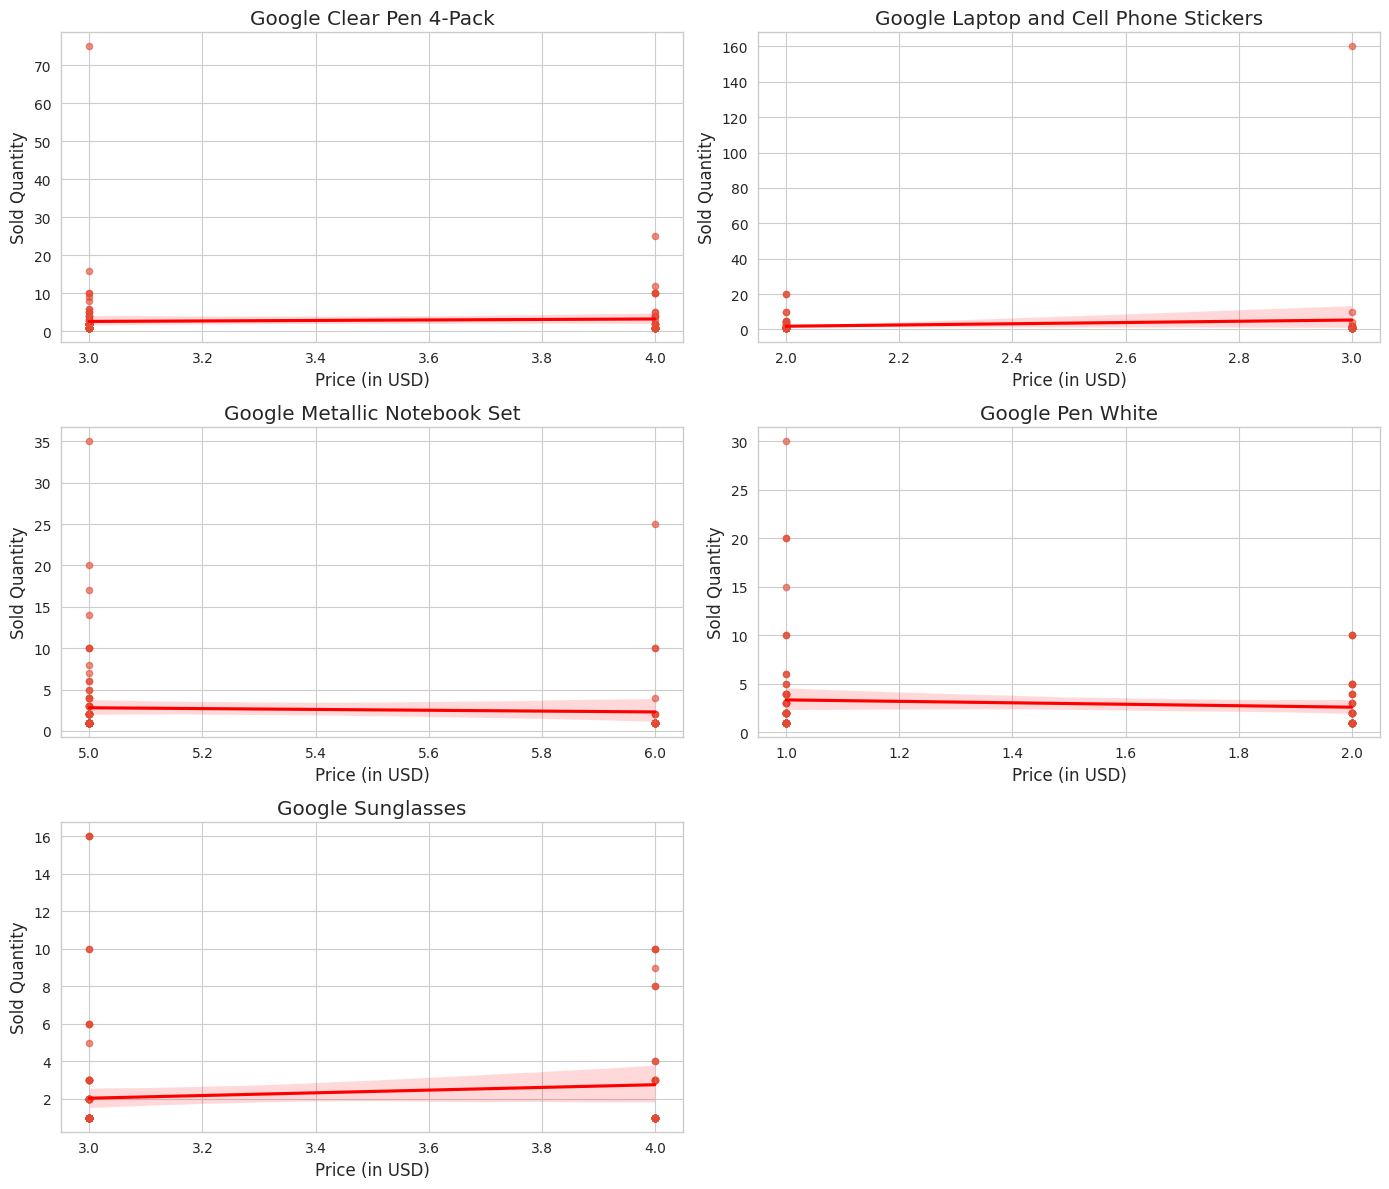

In [26]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create scatter plots with regression lines for the top 5 items by sales quantity
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Remove the last subplot since we only need 5 plots
fig.delaxes(axes[-1])

# Plot each item
for ax, item in zip(axes, top_5_items.index):
    item_data = df[df['item_name'] == item]

    sns.regplot(x='price_in_usd', y='sold_quantity_on_that_date', data=item_data, ax=ax, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'red'})

    ax.set_title(item)
    ax.set_xlabel('Price (in USD)')
    ax.set_ylabel('Sold Quantity')

plt.tight_layout()
plt.show()




---

